In [1]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("../Datasets/amazon_reviews_unlabelled.csv")

In [3]:
df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'UNNAMED: 0', 'REVIEW_TITLE', 'RATINGS', 'REVIEW', 'VERIFIED',
       'USER_NAME', 'USER_ID', 'MAX_REVIEWS_DAY', 'HELPFUL_VOTES', 'PRODUCT',
       'REVIEW_SENTIMENT', 'AVERAGE_RATING', 'RATING_DEVIATION',
       'REVIEW_LENGTH', 'TITLE_LENGTH', 'TOTAL_USER_REVIEWS', 'DATETIME',
       'REVIEW_DATE_DIFF', 'DATE', 'AVG_WORD_LENGTH', 'TOTAL_PRODUCT_REVIEWS',
       'NUM_NOUNS', 'NUM_VERBS', 'NUM_ADJECTIVES', 'NUM_ADVERBS',
       'READABILITY_FRE', 'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT',
       'REVIEW_WORD_COUNT', 'SENTIMENT_SCORE_TITLE', 'NUM_NAMED_ENTITIES',
       'LEXICAL_DIVERSITY', 'WORD_COUNT', 'RATING_CATEGORY',
       'SENTIMENT_CATEGORY', 'COHERENCE', 'TOKENIZED_REVIEW', 'NGRAMS',
       'TOTAL_VERIFIED_REVIEWS', 'TOTAL_USER_HELPFUL_VOTES',
       'PREPROC_REVIEW_TEXT', 'COSINE_DUPLICATE'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

In [20]:
df.to_csv("../Datasets/amazon_reviews_unlabelled.csv")

In [25]:
features = [
    'RATINGS',
        'VERIFIED', 'MAX_REVIEWS_DAY',
       'HELPFUL_VOTES', 'REVIEW_SENTIMENT', 'AVERAGE_RATING',
       'RATING_DEVIATION', 'REVIEW_LENGTH', 'TITLE_LENGTH',
       'TOTAL_USER_REVIEWS', 'REVIEW_DATE_DIFF', 
       'AVG_WORD_LENGTH', 'TOTAL_PRODUCT_REVIEWS', 'READABILITY_FRE',
       'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT', 'REVIEW_WORD_COUNT',
       'SENTIMENT_SCORE_TITLE', 'NUM_NAMED_ENTITIES', 'LEXICAL_DIVERSITY',
       'WORD_COUNT', 'RATING_CATEGORY', 'SENTIMENT_CATEGORY', 'COHERENCE',
        'TOTAL_VERIFIED_REVIEWS',
       'TOTAL_USER_HELPFUL_VOTES'
    
]

In [26]:
len(features)

26

In [63]:
X = df[features]

In [28]:
Y = df['COSINE_DUPLICATE']

In [64]:
#MINMAX SCALING
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [35]:
#INITIALISE THE SOM
som = MiniSom(
    x=15, y=15, #DIMENSION OF GRID
    input_len = 26, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

In [36]:
#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 200
)

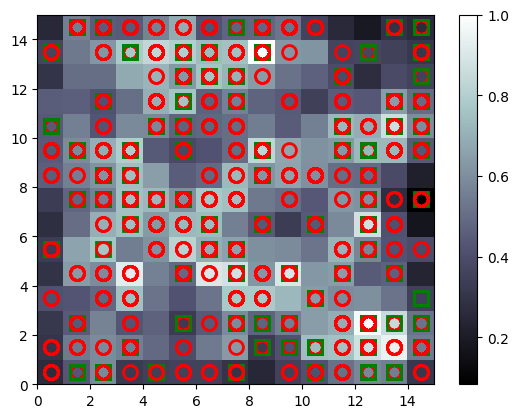

In [37]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES

#ADD MARKERS USING LABELS: DUPLICATE OR NOT DUPLICATE
markers = ['o', 's'] #CIRCLE & SQUARE
colors = ['r', 'g'] #RED OR GREEN


for i, x in enumerate(X): #GET INDEX & DATA
    #GET WINNING NODE FOR RECORD
    w = som.winner(x)
    
    #PLACE MARKER
    plot(
        w[0]+0.5, w[1]+0.5, #COORDINATES OF CENTER OF NODE
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
        
    )
    
show()

In [38]:
#ALL HARMFUL FAKE REVIEWS ARE OUTLIERS: COLLECT THE INDICES
#GET MAPPINGS
mappings = som.win_map(X)

possible_frauds = np.concatenate(
(mappings[(3,4)], mappings[(12,2)],mappings[(13, 1)], mappings[(8, 13)]),
    axis = 0

)

In [39]:
possible_frauds

array([[1.        , 0.        , 0.06382979, ..., 0.        , 0.21875   ,
        1.        ],
       [0.75      , 0.        , 0.06382979, ..., 0.        , 0.21875   ,
        1.        ],
       [0.75      , 0.        , 0.06382979, ..., 0.        , 0.21875   ,
        1.        ],
       ...,
       [0.        , 1.        , 0.06382979, ..., 1.        , 0.2265625 ,
        0.0242915 ],
       [0.        , 1.        , 0.06382979, ..., 1.        , 0.2265625 ,
        0.0242915 ],
       [0.        , 1.        , 0.44680851, ..., 1.        , 0.5390625 ,
        0.01214575]])

In [40]:
possible_frauds_inversed = sc.inverse_transform(possible_frauds)

In [41]:
possible_frauds_inversed

array([[  5.,   0.,   4., ...,   0.,  28., 247.],
       [  4.,   0.,   4., ...,   0.,  28., 247.],
       [  4.,   0.,   4., ...,   0.,  28., 247.],
       ...,
       [  1.,   1.,   4., ...,   1.,  29.,   6.],
       [  1.,   1.,   4., ...,   1.,  29.,   6.],
       [  1.,   1.,  22., ...,   1.,  69.,   3.]])

In [62]:
X

array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 1.        , 0.06382979, ..., 1.        , 0.        ,
        0.        ],
       [0.25      , 1.        , 0.06382979, ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.06382979, ..., 1.        , 0.        ,
        0.        ]])

In [43]:
len(X)

7319

In [49]:
len(possible_frauds)

215

In [65]:
a = possible_frauds[0]
for i in X:
    if np.array_equal(a, i):
        print("Match found")

Match found


In [66]:
#NEW COLUMN WITH ALL ZEROES

for i, x in enumerate(X):
    for j in possible_frauds:
        if np.array_equal(j, x):
            df.iloc[i, -1] = 1
            break

In [67]:
df['SOM OUTLIER'].value_counts()

SOM OUTLIER
0.0    7104
1.0     215
Name: count, dtype: int64